# 데이터 불러오기

In [2]:
import os

with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt','r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

## 명사만 추출하는 코드

In [59]:
import os
from konlpy.tag import Okt
okt = Okt()
tokenized = []

# 파일 열기
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for line in file:
        # 명사만 추출
        nouns = okt.nouns(line)
        tokenized.append(nouns)

# 결과 확인

In [60]:
print(len(tokenized))

71156


In [61]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])

[('작품', 0.8770835995674133),
 ('다큐멘터리', 0.8325138688087463),
 ('드라마', 0.8025432825088501),
 ('영화로', 0.7839052677154541),
 ('주제', 0.7747660279273987),
 ('감동', 0.7719631195068359),
 ('형식', 0.7698812484741211),
 ('소재', 0.7692327499389648),
 ('코미디', 0.762312114238739),
 ('버자이너', 0.7492536902427673)]

In [62]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [63]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


# 데이터셋을 잘 대표하는 단어를 TF-IDF 방식으로 선정

In [64]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

In [65]:
# 예술영화를 대표하는 단어 50개, 일반영화를 대표하는 단어 50개 선정
m1 = X[0].tocoo()    
m2 = X[1].tocoo()    

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)    
w2.sort(key=lambda x: x[1], reverse=True)    

print('예술영화를 대표하는 단어 50개:')
for i in range(50):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어 50개:')
for i in range(50):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')


예술영화를 대표하는 단어 50개:
그녀, 자신, 시작, 위해, 사랑, 사람, 

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 

일반영화를 대표하는 단어 50개:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 

## 위의 코드에서 중복되는 단어들을 제거하고 중요단어를 순서대로 추린다.

In [66]:
# 그 중 선정된 50개 중 10개만 추린 코드(각 항목에는 중복되지 않는 단일 항목에만 존재하는 단어 10개 추출)
n = 10
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 10개 추출
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 10개 추출
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

## 두 개념축이 상반되도록 대표하는 단어셋을 만들어야하기에 
##단어가 서로 중복되지 않게 단어셋을 추출해야한다.

In [67]:
target_art

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정']

In [68]:
target_gen

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문']

In [69]:
genre_txt = ['synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_action.txt', 'synopsis_comedy.txt', 'synopsis_war.txt', 'synopsis_horror.txt']
genre_name = ['드라마', '멜로로맨스', '액션', '코미디', '전쟁', '공포(호러)']

In [70]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))


synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.


In [71]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

### '드라마', '멜로로맨스', '액션', '코미디', '전쟁', '공포(호러)' (각 장르마다 중복되지않게끔 하면 각각의 6개의 장르마다 나온 단어는 중복되지않게 10개 단어 추출
### 예를들어 드라마에 나온10개의 단어는 나머지 6개 장르의 단어에는 중복되지 않게 처리했음###

In [72]:
attributes = []
used_words = set()  # 이미 선택된 단어를 저장할 집합

# 각 장르에 대해 중복되지 않게 단어 추출
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    
    # 각 장르별로 10개 단어를 선택
    while len(attr) < 10:
        candidate_word = vectorizer.get_feature_names()[w[i][j][0]]
        
        # 단어가 model에 있고, 아직 다른 장르에서 선택되지 않은 경우에만 추가
        if candidate_word in model.wv and candidate_word not in used_words:
            attr.append(candidate_word)
            used_words.add(candidate_word)  # 선택된 단어를 중복 방지를 위해 저장
            print(candidate_word, end=', ')
        
        j += 1
    
    attributes.append(attr)
    print() 

드라마: 자신, 영화제, 그녀, 사람, 사랑, 위해, 영화, 시작, 국제, 남자, 
멜로로맨스: 남편, 여자, 친구, 마음, 섹스, 결혼, 서로, 아내, 관계, 부부, 
액션: 조직, 사건, 경찰, 전쟁, 모든, 목숨, 사실, 세계, 가족, 한편, 
코미디: 과연, 마을, 이야기, 인생, 아이, 아버지, 생각, 다른, 생활, 엄마, 
전쟁: 전투, 작전, 독일군, 부대, 독일, 윈터스, 공격, 임무, 연합군, 병사, 
공포(호러): 공포, 발견, 죽음, 하나, 소녀, 살인, 좀비, 정체, 비밀, 점점, 


In [73]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [74]:
def cos_sim(i, j):
    return np.dot(i, j.T) / (np.linalg.norm(i) * np.linalg.norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B

In [75]:
def weat_score(X, Y, A, B):
    s_X = np.array([s(x, A, B) for x in X])  # Apply s() function to each word in X
    s_Y = np.array([s(y, A, B) for y in Y])  # Apply s() function to each word in Y

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return (mean_X - mean_Y) / std_dev

In [76]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

matrix = np.zeros((len(genre_name), len(genre_name)))

for i in range(len(genre_name) - 1):
    for j in range(i + 1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)  # model을 전달하지 않음

# Print or use matrix as needed
print(matrix)

[[ 0.         -1.17856526 -0.67389816 -0.89165705 -0.37779695 -0.81532586]
 [ 0.          0.          0.68135768  0.71320385  0.54052633  0.58684158]
 [ 0.          0.          0.         -0.20270783  0.17294191 -0.32814282]
 [ 0.          0.          0.          0.          0.23502685 -0.11095098]
 [ 0.          0.          0.          0.          0.         -0.26570243]
 [ 0.          0.          0.          0.          0.          0.        ]]


In [77]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

드라마 멜로로맨스 -1.178565263748169
드라마 액션 -0.6738981604576111
드라마 코미디 -0.8916570544242859
드라마 전쟁 -0.3777969479560852
드라마 공포(호러) -0.8153258562088013
멜로로맨스 액션 0.6813576817512512
멜로로맨스 코미디 0.7132038474082947
멜로로맨스 전쟁 0.5405263304710388
멜로로맨스 공포(호러) 0.5868415832519531
액션 코미디 -0.20270782709121704
액션 전쟁 0.1729419082403183
액션 공포(호러) -0.32814282178878784
코미디 전쟁 0.23502685129642487
코미디 공포(호러) -0.11095098406076431
전쟁 공포(호러) -0.26570242643356323


## 결론
드라마 멜로로맨스는 -1.17이기 때문에 예술영화이고
멜로로맨스 코미디는 0.720이기 때문에 일반영화와 같은 인사이트를 도출할 수 있다.

<AxesSubplot:>

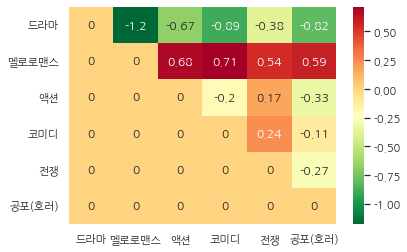

In [78]:
import numpy as np; 
import seaborn as sns; 
import matplotlib.pyplot as plt
np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

### 회고
1. TF-IDF 방식을 활용하여 중요단어를 추출
2. 각각 장르별로 중요단어 10개정도를 추출하고 각 장르별로는 중복되지않게 장르별 10개단어를 추출
3. 그 후 임베딩 편향성을 확인
4. 재미있는 프로젝트였다.